**Nodule-classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!gdown https://drive.google.com/uc?id=1IdC3s1R8G4A60fkuy8i2hWoScOJLVtN_

Downloading...
From: https://drive.google.com/uc?id=1IdC3s1R8G4A60fkuy8i2hWoScOJLVtN_
To: /content/train0.fixed.zip
15.8GB [05:58, 44.0MB/s]


In [ ]:
!zip -FF train.zip -O train.fixed.zip

In [ ]:
!unzip train0.fixed.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/non-nodules/LNDb-0127-find-09-crop-permute-5-3.npy  
  inflating: train/non-nodules/LNDb-0127-find-09-crop-permute-5-4.npy  
  inflating: train/non-nodules/LNDb-0127-find-09-crop-permute-5-5.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-0.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-1.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-2.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-3.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-4.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-1-5.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-2-0.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-2-1.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-2-2.npy  
  inflating: train/non-nodules/LNDb-0127-find-10-crop-permute-2-3.npy  
  inflating: 

In [ ]:
!gdown https://drive.google.com/uc?id=16qmooyApZfjh1OD0oCrWUn4c_7yENBVu

In [ ]:
!unzip train_normalize0.fixed.zip

# Create experiment

In [2]:
%cd /content/drive/My Drive/nodule-classification

/content/drive/My Drive/nodule-classification


In [ ]:
%cd /content/drive/My Drive/Azure/nodule-classification

/content/drive/My Drive/Azure/nodule-classification


In [3]:
import os
def makeTreeDir(base_dir, lstDir):
    lstPath = {}
    for f in lstDir:
        path = os.path.join(base_dir, f)
        lstPath[f] = path
        os.makedirs(path, exist_ok=True)
    return lstPath

base_path = os.getcwd()
result_path = os.path.join(base_path, 'result')
history_path = os.path.join(result_path, 'history')

In [ ]:
train = True
numOrd = 18
name_exp = 'experiment-{:03}'.format(numOrd)
exp_path = os.path.join(history_path, name_exp)

In [ ]:
if os.path.exists(exp_path):
    print('Experiment is exits!')
else:
    os.makedirs(exp_path)
    makeTreeDir(exp_path, ['model_epoch', 'running', 'table-pred'])

Experiment is exits!


# Initial model

In [20]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

import os
import sys
import time
import csv

sys.path.insert(0, 'model')
sys.path.insert(0, 'preprocessing')

from model import generate_model
import copy
import pickle

##Origin model

In [21]:
modify = False

In [ ]:
!nvidia-smi

Thu Jul 30 10:14:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
class opts:
    def __init__(self):
        self.mode = 'score'
        self.batch_size = 120
        self.no_cuda = False
        self.verbose = True
        
        self.sample_size  = 64
        self.sample_duration = 64
        self.n_classes = 2
        
        self.bias = False
        self.model_depth = 10
        self.model_name = 'resnet'        
        self.resnet_shortcut = 'A'
        self.resnext_cardinality = 32

path = os.path.join(exp_path, 'model_info.p')
if not os.path.exists(path) or modify:
    opt = opts()
    with open(path, 'wb') as f:
        pickle.dump(opt, f)
else:
    with open(path, 'rb') as f:
        opt = pickle.load(f)

model = generate_model(opt)

In [ ]:
class opts:
    def __init__(self):
        self.mode = 'score'
        self.batch_size = 120
        self.no_cuda = False
        self.verbose = True
        
        self.sample_size  = 64
        self.sample_duration = 64
        self.n_classes = 2

        self.bias = False
        self.model_depth = 10
        self.model_name = 'resnet'        
        self.resnet_shortcut = 'A'
        self.resnext_cardinality = 32
opt = opts()
model = generate_model(opt)

In [ ]:
if opt.verbose:
    from torchsummary import summary
    summary(model, (3, 64, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 32, 32]          65,920
       BatchNorm3d-2       [-1, 64, 32, 32, 32]             128
              ReLU-3       [-1, 64, 32, 32, 32]               0
         MaxPool3d-4       [-1, 64, 16, 16, 16]               0
            Conv3d-5       [-1, 64, 16, 16, 16]           4,160
       BatchNorm3d-6       [-1, 64, 16, 16, 16]             128
              ReLU-7       [-1, 64, 16, 16, 16]               0
            Conv3d-8       [-1, 64, 16, 16, 16]         110,656
       BatchNorm3d-9       [-1, 64, 16, 16, 16]             128
             ReLU-10       [-1, 64, 16, 16, 16]               0
           Conv3d-11      [-1, 256, 16, 16, 16]          16,640
      BatchNorm3d-12      [-1, 256, 16, 16, 16]             512
             ReLU-13      [-1, 256, 16, 16, 16]               0
       Bottleneck-14      [-1, 256, 16,

In [ ]:
from torchsummary import summary
summary(model, (3, 64, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 32, 32]          65,920
       BatchNorm3d-2       [-1, 64, 32, 32, 32]             128
              ReLU-3       [-1, 64, 32, 32, 32]               0
         MaxPool3d-4       [-1, 64, 16, 16, 16]               0
            Conv3d-5       [-1, 64, 16, 16, 16]           4,160
       BatchNorm3d-6       [-1, 64, 16, 16, 16]             128
              ReLU-7       [-1, 64, 16, 16, 16]               0
            Conv3d-8       [-1, 64, 16, 16, 16]         110,656
       BatchNorm3d-9       [-1, 64, 16, 16, 16]             128
             ReLU-10       [-1, 64, 16, 16, 16]               0
           Conv3d-11      [-1, 256, 16, 16, 16]          16,640
      BatchNorm3d-12      [-1, 256, 16, 16, 16]             512
             ReLU-13      [-1, 256, 16, 16, 16]               0
       Bottleneck-14      [-1, 256, 16,

## Loading pre-trained model

In [ ]:
class opts:
    def __init__(self):
        self.mode = 'score'
        self.batch_size = 64
        self.no_cuda = False
        self.verbose = True
        
        self.sample_size  = 64
        self.sample_duration = 64
        self.n_classes = 700
        
        self.model_depth = 18
        self.model_name = 'resnet'        
        self.resnet_shortcut = 'B'
opt = opts()
model = generate_model(opt)
if opt.verbose:
    from torchsummary import summary
    summary(model, (3, 64, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 32, 32]          65,856
       BatchNorm3d-2       [-1, 64, 32, 32, 32]             128
              ReLU-3       [-1, 64, 32, 32, 32]               0
         MaxPool3d-4       [-1, 64, 16, 16, 16]               0
            Conv3d-5       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-6       [-1, 64, 16, 16, 16]             128
              ReLU-7       [-1, 64, 16, 16, 16]               0
            Conv3d-8       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-9       [-1, 64, 16, 16, 16]             128
             ReLU-10       [-1, 64, 16, 16, 16]               0
       BasicBlock-11       [-1, 64, 16, 16, 16]               0
           Conv3d-12       [-1, 64, 16, 16, 16]         110,592
      BatchNorm3d-13       [-1, 64, 16, 16, 16]             128
             ReLU-14       [-1, 64, 16,

In [ ]:
base_dir = '/content/drive/My Drive/PretrainedModels'
model_name = 'resnet-18-kinetics.pth'
path = os.path.join(base_dir, model_name)
#checkpoint = torch.load(path, map_location= 'cpu')
checkpoint = torch.load(path)

In [ ]:
base_dir = '/content/drive/My Drive/data'
model_name = 'r3d18_K_200ep.pth'
path = os.path.join(base_dir, model_name)
#checkpoint = torch.load(path, map_location= 'cpu')
checkpoint = torch.load(path, map_location=lambda storage, loc: storage)

In [ ]:
model.load_state_dict(checkpoint['state_dict'])

RuntimeError: ignored

In [ ]:
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in checkpoint['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

In [ ]:
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in checkpoint['state_dict'].items():
    name = "module." + k # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

<All keys matched successfully>

## Freez parameters

In [ ]:
count = 0
for layer in model.module.children():
    count += 1
    print('Layer:', count)
    print(layer)
    print('='*30)

Layer: 1
Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
Layer: 2
BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Layer: 3
ReLU(inplace=True)
Layer: 4
MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
Layer: 5
Sequential(
  (0): BasicBlock(
    (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True

In [ ]:
train_layer = 10
freez_layer = count - train_layer

In [ ]:
if torch.cuda.is_available():
    num_ftrs = model.module.fc.in_features
    model.module.fc = nn.Linear(num_ftrs, 2)
    model.to('cuda')

    for layer in model.module.children():
        if freez_layer > 0:
            for x in layer.parameters():
                x.requires_grad = False
            freez_layer -= 1
        else:
            for x in layer.parameters():
                x.requires_grad = True
else:
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    for layer in model.children():
        if freez_layer > 0:
            for x in layer.parameters():
                x.requires_grad = False
            freez_layer -= 1
        else:
            for x in layer.parameters():
                x.requires_grad = True

In [ ]:
if opt.verbose:
    from torchsummary import summary
    summary(model, (3, 64, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 32, 32]          65,856
       BatchNorm3d-2       [-1, 64, 32, 32, 32]             128
              ReLU-3       [-1, 64, 32, 32, 32]               0
         MaxPool3d-4       [-1, 64, 16, 16, 16]               0
            Conv3d-5       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-6       [-1, 64, 16, 16, 16]             128
              ReLU-7       [-1, 64, 16, 16, 16]               0
            Conv3d-8       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-9       [-1, 64, 16, 16, 16]             128
             ReLU-10       [-1, 64, 16, 16, 16]               0
       BasicBlock-11       [-1, 64, 16, 16, 16]               0
           Conv3d-12       [-1, 64, 16, 16, 16]         110,592
      BatchNorm3d-13       [-1, 64, 16, 16, 16]             128
             ReLU-14       [-1, 64, 16,

# Running

In [ ]:
def writeCsv(path, header, data):
    with open(path, mode = 'w') as fileSave:
        tar = csv.writer(fileSave, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        #Write in cvs
        tar.writerow(header)
        for row in data:
            tar.writerow(row)
def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)

In [ ]:
from preprocessing import inputs_ as I

## Train

In [ ]:
def train(model, criterion, optimizer, batchsize, Data, size, save_path, num_epochs=25, normalize_data = False):
    since = time.time()

    history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    model_path = os.path.join(save_path, 'model_epoch')
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        epoch_time = time.time()
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                batchData = I.makeBatch(Data[phase], batchsize, size)
                numCandidate = 0
            else:
                model.eval()   # Set model to evaluate mode
                numCandidate = sum(I.countCandiate(Data[phase]).values())
                batchData = I.makeBatch_(Data[phase], batchsize, size)

            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.          
            for inputs, labels in batchData:
                labels = to_var(torch.LongTensor(labels).view(-1))
                inputs = to_var(torch.from_numpy(inputs).float())

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        numCandidate += inputs.size(0)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            print("Amount: ", numCandidate)
            epoch_loss = running_loss / numCandidate
            epoch_acc = float(running_corrects.double() / numCandidate)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'train':
                history['loss'].append(epoch_loss)
                history['acc'].append(epoch_acc)
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc)
                path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch))
                torch.save({'state_dict': model.state_dict(),
                            'optimize': optimizer.state_dict(),
                            'epoch': epoch},
                            path)
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print('Time: {}'.format(time.time() - epoch_time))
        run_path = os.path.join(save_path, 'running')
        path = os.path.join(run_path, 'history-running.p')
        with open(path, 'wb') as f:
            pickle.dump(history, f)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

###Cross entropy loss

In [ ]:
Data = {'train': '/content/train', 'val': '../data3/val'}
if train:
    #train_model(model, epochs = 100, batchsize = opt.batch_size, pathData = pathData, size = 64, save_path = exp_path)
    learning_rate = 1e-06
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    criterion = nn.CrossEntropyLoss()
    model = copy.deepcopy(train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, num_epochs=100))

Epoch 0/99
----------
Amount:  52680
train Loss: 0.6803 Acc: 0.5690
Amount:  121
val Loss: 0.6862 Acc: 0.5950
Time: 1125.0687839984894

Epoch 1/99
----------
Amount:  52680
train Loss: 0.6440 Acc: 0.6330
Amount:  121
val Loss: 0.6859 Acc: 0.6364
Time: 1053.4159936904907

Epoch 2/99
----------


#### Overwrite with SGD

In [ ]:
sys.path.insert(0, 'running')
from running import train as T

Data = {'train': '/content/train', 'val': '../data3/val'}

learning_rate = 1e-06
momentum = 0.9
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
weight = torch.tensor([1.35238095, 0.79329609]).cuda()
criterion = nn.CrossEntropyLoss(weight=weight)
# criterion = nn.CrossEntropyLoss()

T.train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, num_epochs=100)

Epoch 0/99
----------
Amount:  41748
train Loss: 0.6823 Acc: 0.5426
Amount:  121
val Loss: 0.6774 Acc: 0.6364
Time: 901.6548104286194

Epoch 1/99
----------
Amount:  41748
train Loss: 0.6552 Acc: 0.6145
Amount:  121
val Loss: 0.6800 Acc: 0.6116
Time: 816.348804473877

Epoch 2/99
----------
Amount:  41748
train Loss: 0.6414 Acc: 0.6326
Amount:  121
val Loss: 0.6861 Acc: 0.6612
Time: 807.6791815757751

Epoch 3/99
----------
Amount:  41748
train Loss: 0.6314 Acc: 0.6476
Amount:  121
val Loss: 0.6914 Acc: 0.6529
Time: 801.9440312385559

Epoch 4/99
----------
Amount:  41748
train Loss: 0.6238 Acc: 0.6566
Amount:  121
val Loss: 0.6943 Acc: 0.6612
Time: 801.664041519165

Epoch 5/99
----------
Amount:  41748
train Loss: 0.6172 Acc: 0.6646
Amount:  121
val Loss: 0.6961 Acc: 0.6446
Time: 804.0788726806641

Epoch 6/99
----------
Amount:  41748
train Loss: 0.6113 Acc: 0.6712
Amount:  121
val Loss: 0.6922 Acc: 0.6612
Time: 803.1468641757965

Epoch 7/99
----------
Amount:  41748
train Loss: 0.6050 A

In [ ]:
sys.path.insert(0, 'running')
from running import train as T
class opts:
    def __init__(self):
        self.mode = 'score'
        self.batch_size = 120
        self.no_cuda = False
        self.verbose = True
        
        self.sample_size  = 64
        self.sample_duration = 64
        self.n_classes = 2
        
        self.bias = True
        self.model_depth = 10
        self.model_name = 'resnet'        
        self.resnet_shortcut = 'A'
        self.resnext_cardinality = 32
        
opt = opts()
model = generate_model(opt)

Data = {'train': '/content/train', 'val': '../data3/val'}

epoch_retrain = 81

branch = None
model_path = os.path.join(exp_path, 'model_epoch')
if branch == None:  
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch_retrain))
else:
    path = os.path.join(model_path, 'model-epoch-{}-{}.pth'.format(epoch_retrain, branch))
infoModel = torch.load(path)

model.load_state_dict(infoModel["state_dict"])

learning_rate = 1e-06
momentum = 0.9
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
optimizer.load_state_dict(infoModel['optimize'])

weight = torch.tensor([1.35238095, 0.79329609]).cuda()
criterion = nn.CrossEntropyLoss()

T.re_train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, start_epoch = epoch_retrain + 1, num_epochs=100, branch = branch)

Epoch 82/99
----------
Amount:  41748
train Loss: 0.0639 Acc: 0.9906
Amount:  121
val Loss: 1.1150 Acc: 0.6694
Time: 920.8252334594727

Epoch 83/99
----------
Amount:  41748
train Loss: 0.0612 Acc: 0.9916
Amount:  121
val Loss: 1.1442 Acc: 0.6860
Time: 815.4104571342468

Epoch 84/99
----------
Amount:  41748
train Loss: 0.0574 Acc: 0.9923
Amount:  121
val Loss: 1.1623 Acc: 0.6694
Time: 813.1582629680634

Epoch 85/99
----------
Amount:  41748
train Loss: 0.0547 Acc: 0.9925
Amount:  121
val Loss: 1.1924 Acc: 0.6860
Time: 811.2229580879211

Epoch 86/99
----------
Amount:  41748
train Loss: 0.0525 Acc: 0.9928
Amount:  121
val Loss: 1.1795 Acc: 0.6446
Time: 815.0093126296997

Epoch 87/99
----------
Amount:  41748
train Loss: 0.0508 Acc: 0.9929
Amount:  121
val Loss: 1.2373 Acc: 0.6777
Time: 815.262722492218

Epoch 88/99
----------
Amount:  41748
train Loss: 0.0474 Acc: 0.9935
Amount:  121
val Loss: 1.2651 Acc: 0.6694
Time: 814.3667657375336

Epoch 89/99
----------
Amount:  41748
train Loss:

###Binary cross entropy loss

In [ ]:
def train(model, criterion, optimizer, batchsize, Data, size, save_path, num_epochs=25, normalize_data = False):
    since = time.time()

    history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    model_path = os.path.join(save_path, 'model_epoch')
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        epoch_time = time.time()
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                batchData = I.makeBatch(Data[phase], batchsize, size)
                numCandidate = 0
            else:
                model.eval()   # Set model to evaluate mode
                numCandidate = sum(I.countCandiate(Data[phase]).values())
                batchData = I.makeBatch_(Data[phase], batchsize, size)

            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.          
            for inputs, labels in batchData:
                labels = to_var(torch.LongTensor(labels).view(-1))
                inputs = to_var(torch.from_numpy(inputs).float())

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    preds = torch.sigmoid(outputs)
                    preds[preds<0.5] = 0.0
                    preds[preds>=0.5] = 1.0
                   
                    loss = criterion(outputs, labels.float().unsqueeze(1))

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        numCandidate += inputs.size(0)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.float().unsqueeze(1))

            print("Amount: ", numCandidate)
            epoch_loss = running_loss / numCandidate
            epoch_acc = float(running_corrects.double() / numCandidate)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'train':
                history['loss'].append(epoch_loss)
                history['acc'].append(epoch_acc)
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc)
                path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch))
                torch.save({'state_dict': model.state_dict(),
                            'optimize': optimizer.state_dict(),
                            'epoch': epoch},
                            path)
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print('Time: {}'.format(time.time() - epoch_time))
        run_path = os.path.join(save_path, 'running')
        path = os.path.join(run_path, 'history-running.p')
        with open(path, 'wb') as f:
            pickle.dump(history, f)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#### Adam optimizer

In [ ]:
Data = {'train': '/content/train', 'val': '../data3/val'}
if train:
    #train_model(model, epochs = 100, batchsize = opt.batch_size, pathData = pathData, size = 64, save_path = exp_path)
    learning_rate = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    criterion = nn.BCEWithLogitsLoss()
    model = copy.deepcopy(train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, num_epochs=100))

Epoch 0/99
----------
Amount:  52672
train Loss: 0.5669 Acc: 0.7123
Amount:  121
val Loss: 0.7788 Acc: 0.5537
Time: 833.590699672699

Epoch 1/99
----------
Amount:  52672
train Loss: 0.4120 Acc: 0.8086
Amount:  121
val Loss: 0.7935 Acc: 0.5868
Time: 836.4496829509735

Epoch 2/99
----------
Amount:  52672
train Loss: 0.2487 Acc: 0.8914
Amount:  121
val Loss: 1.1148 Acc: 0.6281
Time: 839.6421349048615

Epoch 3/99
----------
Amount:  52672
train Loss: 0.1553 Acc: 0.9334
Amount:  121
val Loss: 1.5316 Acc: 0.5620
Time: 836.1543850898743

Epoch 4/99
----------
Amount:  52672
train Loss: 0.1126 Acc: 0.9513
Amount:  121
val Loss: 1.9402 Acc: 0.6860
Time: 836.8176975250244

Epoch 5/99
----------
Amount:  52672
train Loss: 0.0899 Acc: 0.9600
Amount:  121
val Loss: 1.8723 Acc: 0.6364
Time: 836.8829157352448

Epoch 6/99
----------
Amount:  52672
train Loss: 0.0782 Acc: 0.9653
Amount:  121
val Loss: 2.0006 Acc: 0.6446
Time: 836.9116241931915

Epoch 7/99
----------
Amount:  52672
train Loss: 0.0698 

#### SGD optimizer

In [ ]:
sys.path.insert(0, 'running')
from running import train as T

Data = {'train': '/content/train', 'val': '../data3/val'}

learning_rate = 1e-05
momentum = 0.9
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)
# optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# pos_weight = torch.tensor([1.704761904761905]).cuda()
# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion = nn.BCEWithLogitsLoss()

T.train_Binary(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, num_epochs=100)

Epoch 0/99
----------
Amount:  41748
train Loss: 0.6669 Acc: 0.6028
Amount:  121
val Loss: 0.6611 Acc: 0.6281
Time: 874.8825378417969

Epoch 1/99
----------
Amount:  41748
train Loss: 0.6517 Acc: 0.6304
Amount:  121
val Loss: 0.6587 Acc: 0.6281
Time: 804.5402574539185

Epoch 2/99
----------
Amount:  41748
train Loss: 0.6487 Acc: 0.6310
Amount:  121
val Loss: 0.6576 Acc: 0.6281
Time: 793.2406303882599

Epoch 3/99
----------
Amount:  41748
train Loss: 0.6459 Acc: 0.6315
Amount:  121
val Loss: 0.6571 Acc: 0.6446
Time: 796.0414335727692

Epoch 4/99
----------
Amount:  41748
train Loss: 0.6437 Acc: 0.6324
Amount:  121
val Loss: 0.6579 Acc: 0.6446
Time: 797.5352923870087

Epoch 5/99
----------
Amount:  41748
train Loss: 0.6419 Acc: 0.6344
Amount:  121
val Loss: 0.6572 Acc: 0.6612
Time: 798.546525478363

Epoch 6/99
----------
Amount:  41748
train Loss: 0.6400 Acc: 0.6374
Amount:  121
val Loss: 0.6574 Acc: 0.6612
Time: 797.7144434452057

Epoch 7/99
----------
Amount:  41748
train Loss: 0.6384 

In [ ]:
!nvidia-smi

Tue May 26 14:51:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    59W / 149W |   9779MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        2.3G         19G        4.9M        3.2G         23G
Swap:            0B          0B          0B


## Re-train

In [ ]:
def re_train(model, criterion, optimizer, batchsize, Data, size, save_path, start_epoch, num_epochs=25, normalize_data = False):
    since = time.time()
    #Add history
    run_path = os.path.join(save_path, 'running')
    path = os.path.join(run_path, 'history-running.p')
    with open(path, 'rb') as f:
        history = pickle.load(f)

    for x in history.keys():
        if len(history[x]) < start_epoch:
            start_epoch = len(history[x])    
    for x in history.keys():
        history[x] = history[x][:start_epoch]

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    #Re train epoch
    
    model_path = os.path.join(save_path, 'model_epoch')
    for epoch in range(start_epoch, num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        epoch_time = time.time()
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                batchData = I.makeBatch(Data[phase], batchsize, size)
                numCandidate = 0
            else:
                model.eval()   # Set model to evaluate mode
                numCandidate = sum(I.countCandiate(Data[phase]).values())
                batchData = I.makeBatch_(Data[phase], batchsize, size)

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in batchData:
                labels = to_var(torch.LongTensor(labels).view(-1))
                inputs = to_var(torch.from_numpy(inputs).float())

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        numCandidate += inputs.size(0)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            print("Amount: ", numCandidate)
            epoch_loss = running_loss / numCandidate
            epoch_acc = float(running_corrects.double() / numCandidate)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'train':
                history['loss'].append(epoch_loss)
                history['acc'].append(epoch_acc)
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc)
                path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch))
                torch.save({'state_dict': model.state_dict(),
                            'optimize': optimizer.state_dict(),
                            'epoch': epoch},
                            path)
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print('Time: {}'.format(time.time() - epoch_time))
        run_path = os.path.join(save_path, 'running')
        path = os.path.join(run_path, 'history-running.p')
        with open(path, 'wb') as f:
            pickle.dump(history, f)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

###Non freez parameters

#####Cross entropy loss

In [ ]:
Data = {'train': '/content/train', 'val': '../data3/val'}
epoch_retrain = 26
if train:
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch_retrain))
    infoModel = torch.load(path)

    model.load_state_dict(infoModel["state_dict"])
    learning_rate = 1e-06
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    optimizer.load_state_dict(infoModel['optimize'])
    criterion = nn.CrossEntropyLoss()
 
    model = copy.deepcopy(re_train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, start_epoch = epoch_retrain + 1, num_epochs=175, normalize_data = True))

Epoch 27/174
----------
Amount:  52680
train Loss: 0.3612 Acc: 0.8635
Amount:  121
val Loss: 0.7935 Acc: 0.5950
Time: 1094.5213477611542

Epoch 28/174
----------
Amount:  52680
train Loss: 0.3453 Acc: 0.8729
Amount:  121
val Loss: 0.8042 Acc: 0.5950
Time: 1143.8714129924774

Epoch 29/174
----------
Amount:  52680
train Loss: 0.3300 Acc: 0.8825
Amount:  121
val Loss: 0.8163 Acc: 0.5868
Time: 1143.3466229438782

Epoch 30/174
----------
Amount:  52680
train Loss: 0.3149 Acc: 0.8910
Amount:  121
val Loss: 0.8290 Acc: 0.5785
Time: 1141.538688659668

Epoch 31/174
----------
Amount:  52680
train Loss: 0.2999 Acc: 0.9002
Amount:  121
val Loss: 0.8437 Acc: 0.5785
Time: 1010.4280724525452

Epoch 32/174
----------
Amount:  52680
train Loss: 0.2852 Acc: 0.9087
Amount:  121
val Loss: 0.8596 Acc: 0.5785
Time: 847.6718349456787

Epoch 33/174
----------
Amount:  52680
train Loss: 0.2706 Acc: 0.9163
Amount:  121
val Loss: 0.8762 Acc: 0.5785
Time: 848.9766664505005

Epoch 34/174
----------
Amount:  5268

####Binary cross entropy loss

##### Adam optimizer

In [ ]:
def re_train(model, criterion, optimizer, batchsize, Data, size, save_path, start_epoch, num_epochs=25, normalize_data = False):
    since = time.time()
    #Add history
    run_path = os.path.join(save_path, 'running')
    path = os.path.join(run_path, 'history-running.p')
    with open(path, 'rb') as f:
        history = pickle.load(f)

    for x in history.keys():
        if len(history[x]) < start_epoch:
            start_epoch = len(history[x])    
    for x in history.keys():
        history[x] = history[x][:start_epoch]

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    #Re train epoch
    
    model_path = os.path.join(save_path, 'model_epoch')
    for epoch in range(start_epoch, num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        epoch_time = time.time()
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                batchData = I.makeBatch(Data[phase], batchsize, size)
                numCandidate = 0
            else:
                model.eval()   # Set model to evaluate mode
                numCandidate = sum(I.countCandiate(Data[phase]).values())
                batchData = I.makeBatch_(Data[phase], batchsize, size)

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in batchData:
                labels = to_var(torch.LongTensor(labels).view(-1))
                inputs = to_var(torch.from_numpy(inputs).float())

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    preds = torch.sigmoid(outputs)
                    preds[preds<0.5] = 0.0
                    preds[preds>=0.5] = 1.0
                    loss = criterion(outputs, labels.float().unsqueeze(1))

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        numCandidate += inputs.size(0)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.float().unsqueeze(1))

            print("Amount: ", numCandidate)
            epoch_loss = running_loss / numCandidate
            epoch_acc = float(running_corrects.double() / numCandidate)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'train':
                history['loss'].append(epoch_loss)
                history['acc'].append(epoch_acc)
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc)
                path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch))
                torch.save({'state_dict': model.state_dict(),
                            'optimize': optimizer.state_dict(),
                            'epoch': epoch},
                            path)
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print('Time: {}'.format(time.time() - epoch_time))
        run_path = os.path.join(save_path, 'running')
        path = os.path.join(run_path, 'history-running.p')
        with open(path, 'wb') as f:
            pickle.dump(history, f)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
Data = {'train': '/content/train', 'val': '../data3/val'}
epoch_retrain = 121
if train:
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch_retrain))
    infoModel = torch.load(path)

    model.load_state_dict(infoModel["state_dict"])
    learning_rate = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    optimizer.load_state_dict(infoModel['optimize'])
    criterion = nn.BCEWithLogitsLoss()
 
    model = copy.deepcopy(re_train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, start_epoch = epoch_retrain + 1, num_epochs=175, normalize_data = True))

Epoch 122/174
----------
Amount:  52672
train Loss: 0.0047 Acc: 0.9984
Amount:  121
val Loss: 2.6088 Acc: 0.6860
Time: 1154.264358997345

Epoch 123/174
----------
Amount:  52672
train Loss: 0.0029 Acc: 0.9990
Amount:  121
val Loss: 2.5111 Acc: 0.6860
Time: 1148.203150510788

Epoch 124/174
----------
Amount:  52672
train Loss: 0.0056 Acc: 0.9984
Amount:  121
val Loss: 2.5024 Acc: 0.7025
Time: 1143.7924518585205

Epoch 125/174
----------
Amount:  52672
train Loss: 0.0031 Acc: 0.9990
Amount:  121
val Loss: 2.2293 Acc: 0.7107
Time: 1140.483413696289

Epoch 126/174
----------
Amount:  52672
train Loss: 0.0059 Acc: 0.9983
Amount:  121
val Loss: 2.4994 Acc: 0.6942
Time: 1141.5099692344666

Epoch 127/174
----------
Amount:  52672
train Loss: 0.0026 Acc: 0.9992
Amount:  121
val Loss: 2.7067 Acc: 0.6777
Time: 1139.269675731659

Epoch 128/174
----------
Amount:  52672
train Loss: 0.0018 Acc: 0.9994
Amount:  121
val Loss: 2.5411 Acc: 0.7190
Time: 1141.010039806366

Epoch 129/174
----------
Amount:

##### SGD optimizer

In [ ]:
sys.path.insert(0, 'running')
from running import train as T

Data = {'train': '/content/train', 'val': '../data3/val'}

#Load pre-trained
epoch_retrain = 71
model_path = os.path.join(exp_path, 'model_epoch')
path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch_retrain))
infoModel = torch.load(path)
model.load_state_dict(infoModel["state_dict"])

#Optimizer
learning_rate = 5*1e-05
momentum = 0.9
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)
# optimizer.load_state_dict(infoModel['optimize'])

#Loss function
# pos_weight = torch.tensor([1.704761904761905]).cuda()
# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion = nn.BCEWithLogitsLoss()

T.re_train_Binary(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, start_epoch = epoch_retrain + 1, num_epochs=100)

Epoch 72/99
----------
Amount:  41748
train Loss: 0.5819 Acc: 0.6974
Amount:  121
val Loss: 0.6703 Acc: 0.6860
Time: 886.8701612949371

Epoch 73/99
----------
Amount:  41748
train Loss: 0.5809 Acc: 0.6985
Amount:  121
val Loss: 0.6727 Acc: 0.6777
Time: 817.4673979282379

Epoch 74/99
----------
Amount:  41748
train Loss: 0.5793 Acc: 0.7016
Amount:  121
val Loss: 0.6715 Acc: 0.6860
Time: 807.0024642944336

Epoch 75/99
----------
Amount:  41748
train Loss: 0.5771 Acc: 0.7013
Amount:  121
val Loss: 0.6703 Acc: 0.6860
Time: 808.3226180076599

Epoch 76/99
----------
Amount:  41748
train Loss: 0.5756 Acc: 0.7045
Amount:  121
val Loss: 0.6714 Acc: 0.6860
Time: 810.8555035591125

Epoch 77/99
----------
Amount:  41748
train Loss: 0.5737 Acc: 0.7067
Amount:  121
val Loss: 0.6665 Acc: 0.6612
Time: 811.6166505813599

Epoch 78/99
----------
Amount:  41748
train Loss: 0.5716 Acc: 0.7086
Amount:  121
val Loss: 0.6699 Acc: 0.6777
Time: 813.5828766822815

Epoch 79/99
----------
Amount:  41748
train Loss

###Freez parameters

In [ ]:
epoch_retrain = 71
class opts:
    def __init__(self):
        self.mode = 'score'
        self.batch_size = 16
        self.no_cuda = False
        self.verbose = True
        
        self.sample_size  = 64
        self.sample_duration = 64
        self.n_classes = 2
        
        self.model_depth = 18
        self.model_name = 'resnet'        
        self.resnet_shortcut = 'A'
opt = opts()
model = generate_model(opt)

model_path = os.path.join(exp_path, 'model_epoch')
path = os.path.join(model_path, 'model-epoch-{}.pth'.format(epoch_retrain))
infoModel = torch.load(path)

model.load_state_dict(infoModel["state_dict"])

<All keys matched successfully>

In [ ]:
count = 0
for layer in model.module.children():
    count += 1
    print('Layer:', count)
    print(layer)
    print('='*30)

Layer: 1
Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
Layer: 2
BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Layer: 3
ReLU(inplace=True)
Layer: 4
MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
Layer: 5
Sequential(
  (0): BasicBlock(
    (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True

In [ ]:
train_layer = 3
freez_layer = count - train_layer

In [ ]:
if torch.cuda.is_available():
    num_ftrs = model.module.fc.in_features
    model.module.fc = nn.Linear(num_ftrs, 2)
    model.to('cuda')

    for layer in model.module.children():
        if freez_layer > 0:
            for x in layer.parameters():
                x.requires_grad = False
            freez_layer -= 1
        else:
            for x in layer.parameters():
                x.requires_grad = True
else:
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    for layer in model.children():
        if freez_layer > 0:
            for x in layer.parameters():
                x.requires_grad = False
            freez_layer -= 1
        else:
            for x in layer.parameters():
                x.requires_grad = True

In [ ]:
if opt.verbose:
    from torchsummary import summary
    summary(model, (3, 64, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 32, 32]          65,856
       BatchNorm3d-2       [-1, 64, 32, 32, 32]             128
              ReLU-3       [-1, 64, 32, 32, 32]               0
         MaxPool3d-4       [-1, 64, 16, 16, 16]               0
            Conv3d-5       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-6       [-1, 64, 16, 16, 16]             128
              ReLU-7       [-1, 64, 16, 16, 16]               0
            Conv3d-8       [-1, 64, 16, 16, 16]         110,592
       BatchNorm3d-9       [-1, 64, 16, 16, 16]             128
             ReLU-10       [-1, 64, 16, 16, 16]               0
       BasicBlock-11       [-1, 64, 16, 16, 16]               0
           Conv3d-12       [-1, 64, 16, 16, 16]         110,592
      BatchNorm3d-13       [-1, 64, 16, 16, 16]             128
             ReLU-14       [-1, 64, 16,

In [ ]:
Data = {'train': '/content/train_normalize', 'val': '../data3/val_normalize'}

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
optimizer.load_state_dict(infoModel['optimize'])
criterion = nn.CrossEntropyLoss()

model = copy.deepcopy(re_train(model, criterion, optimizer, opt.batch_size, Data, size = 64, save_path = exp_path, start_epoch = epoch_retrain + 1, num_epochs=100))

Epoch 72/99
----------
Amount:  52640
train Loss: 0.0549 Acc: 0.9803
Amount:  121
val Loss: 2.6523 Acc: 0.6694
Time: 1009.086061000824

Epoch 73/99
----------
Amount:  52640
train Loss: 0.0098 Acc: 0.9969
Amount:  121
val Loss: 3.6557 Acc: 0.6364
Time: 988.8734114170074

Epoch 74/99
----------
Amount:  52640
train Loss: 0.0090 Acc: 0.9973
Amount:  121
val Loss: 3.4956 Acc: 0.5785
Time: 988.3845193386078

Epoch 75/99
----------
Amount:  52640
train Loss: 0.0079 Acc: 0.9974
Amount:  121
val Loss: 3.6352 Acc: 0.6116
Time: 988.4779074192047

Epoch 76/99
----------
Amount:  52640
train Loss: 0.0059 Acc: 0.9981
Amount:  121
val Loss: 3.3302 Acc: 0.6281
Time: 987.5607912540436

Epoch 77/99
----------
Amount:  52640
train Loss: 0.0049 Acc: 0.9986
Amount:  121
val Loss: 4.0798 Acc: 0.6116
Time: 987.7010555267334

Epoch 78/99
----------
Amount:  52640
train Loss: 0.0063 Acc: 0.9983
Amount:  121
val Loss: 3.9232 Acc: 0.6281
Time: 987.8928925991058

Epoch 79/99
----------
Amount:  52640
train Loss

## Test

In [ ]:
import copy
def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)
def val_model(model, criterion, base_dir, data, num_epochs=25, normalize_data = False):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_epoch = 0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        path = os.path.join(base_dir, 'model-epoch-{}.pth'.format(epoch))
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["state_dict"])

        # Each epoch has a training and validation phase
        phase = 'val'

        model.eval()   # Set model to evaluate mode

        running_loss = 0.0
        running_corrects = 0

        numCandidate = sum(I.countCandiate(data).values())
        batchData = I.makeBatch_(data, 32, 64)
        # Iterate over data.
        for inputs, labels in batchData:
            labels = to_var(torch.LongTensor(labels).view(-1))
            inputs = to_var(torch.from_numpy(inputs).float())

            # zero the parameter gradients
            # optimizer.zero_grad()

            # track history if only in train
            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / numCandidate
        epoch_acc = running_corrects.double() / numCandidate

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            phase, epoch_loss, epoch_acc))
        # deep copy the model
        if epoch_acc > best_acc:
            best_epoch = epoch
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}, epoch: {}'.format(best_acc, best_epoch))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
print('loading model')
model_path = os.path.join(exp_path, 'model_epoch')
lst_model = os.listdir(model_path)

pathDataVal = '../data3/test_normalize'
history_val = {'val_loss': [], 'val_acc': []}

criterion = nn.CrossEntropyLoss()
model = val_model(model, criterion, model_path, pathDataVal, num_epochs=175)

loading model
Epoch 0/174
----------
val Loss: 0.6372 Acc: 0.6463

Epoch 1/174
----------
val Loss: 0.7387 Acc: 0.6626

Epoch 2/174
----------
val Loss: 1.5651 Acc: 0.6341

Epoch 3/174
----------
val Loss: 2.4007 Acc: 0.6545

Epoch 4/174
----------
val Loss: 1.6251 Acc: 0.5854

Epoch 5/174
----------
val Loss: 2.0797 Acc: 0.5935

Epoch 6/174
----------
val Loss: 2.3952 Acc: 0.6463

Epoch 7/174
----------
val Loss: 2.0686 Acc: 0.6382

Epoch 8/174
----------
val Loss: 1.8424 Acc: 0.6138

Epoch 9/174
----------
val Loss: 2.2584 Acc: 0.5894

Epoch 10/174
----------
val Loss: 2.2091 Acc: 0.6382

Epoch 11/174
----------
val Loss: 2.9693 Acc: 0.6260

Epoch 12/174
----------
val Loss: 2.3930 Acc: 0.6504

Epoch 13/174
----------
val Loss: 2.2274 Acc: 0.6341

Epoch 14/174
----------
val Loss: 2.5201 Acc: 0.6179

Epoch 15/174
----------
val Loss: 3.3575 Acc: 0.6504

Epoch 16/174
----------
val Loss: 2.8652 Acc: 0.6098

Epoch 17/174
----------
val Loss: 2.6565 Acc: 0.6545

Epoch 18/174
----------


## Evaluate

In [ ]:
import copy
def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)
def predict(model, criterion, base_dir, data, num_epochs=25):
    since = time.time()
    predLabel = []
    trueLabel = []
    model.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    numCandidate = sum(I.countCandiate(data).values())
    batchData = I.makeBatch_(data, 32, 64)
    # Iterate over data.
    for inputs, labels in batchData:
        labels = to_var(torch.LongTensor(labels).view(-1))
        inputs = to_var(torch.from_numpy(inputs).float())

        # zero the parameter gradients
        # optimizer.zero_grad()

        # track history if only in train
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        predLabel += preds.tolist()
        trueLabel += labels.tolist()

    epoch_loss = running_loss / numCandidate
    epoch_acc = running_corrects.double() / numCandidate

    time_elapsed = time.time() - since
    print('Complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    return predLabel, trueLabel

In [ ]:
print('Epoch {}/{}'.format(epoch, num_epochs - 1))
print('-' * 10)
path = os.path.join(base_dir, 'model-epoch-{}.pth'.format(epoch))
checkpoint = torch.load(path)
model.load_state_dict(checkpoint["satate_dict"])

In [ ]:
import torch.nn.functional as F
def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)
def evaluate(model, epoch, batchsize, pathData, part, size, criterion, save_path = ''): 
    predLabel = []
    trueLabel = []
    nameCandidate = []

    table_path = os.path.join(save_path, 'table-pred')

    numCandidate = sum(I.countCandiate(pathData).values())
    batchData = I.makeBatch(pathData, batchsize, size)

    running_loss = 0.0
    running_corrects = 0
    with torch.no_grad():
        for inputs, label, name in batchData:
            labels = to_var(torch.LongTensor(label).view(-1))
            inputs = to_var(torch.from_numpy(inputs).float())
            
            outputs = model(inputs) 
            _, preds = outputs.topk(1, 1, True)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            running_corrects += preds.eq(labels.view(1, -1))
            
            predLabel += preds.data.tolist()
            trueLabel += label
            nameCandidate += name
        epoch_loss = running_loss
        epochs_acc = float(running_corrects) / numCandidate
    """
    if save_path != '':  
        #Save preds epoch
        path = os.path.join(table_path, 'epoch-{}-{}.csv'.format(part, epoch))
        with open(path, mode = 'w') as fileSave:
            tar = csv.writer(fileSave, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            header = ['Name', 'Label', 'Pred']
            #Write in cvs
            tar.writerow(header)
            for i, name in enumerate(nameCandidate):
                tar.writerow([name, trueLabel[i], predLabel[i]])
    """
    return epoch_loss, epochs_acc

In [ ]:
history_val = {'val_loss': [], 'val_acc': []}
history_test = {'test_loss': [], 'test_acc': []}
model_path = os.path.join(exp_path, 'model_epoch')

pathDataVal = '../data3/val'
pathDataTest = '../data3/test'
for epoch in range(50):
    name = 'model-epoch-{}.pth'.format(epoch)
    print(name,":")
    start_time = time.time()

    path = os.path.join(model_path, name)
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()

    criterion = nn.CrossEntropyLoss()
    
    val_loss, val_acc = evaluate(model, epoch, opt.batch_size, pathDataVal, 'val', 64, criterion, exp_path)
    history_val['val_loss'].append(val_loss)
    history_val['val_acc'].append(val_acc)
    print('Val\t', "Loss:", val_loss, "Acc:", val_acc)

    test_loss, test_acc = evaluate(model, epoch, opt.batch_size, pathDataTest, 'test', 64, criterion, exp_path)
    history_test['test_loss'].append(test_loss)
    history_test['test_acc'].append(test_acc)
    print('Test\t', "Loss:", test_loss, "Acc:", test_acc)
    
    print("Time: {}".format(time.time() - start_time))
    print("="*30)

run_path = os.path.join(exp_path, 'running')
path = os.path.join(run_path, 'history-val.p')
with open(path, 'wb') as f:
    pickle.dump(history_val, f)

run_path = os.path.join(exp_path, 'running')
path = os.path.join(run_path, 'history-test.p')
with open(path, 'wb') as f:
    pickle.dump(history_test, f)

In [ ]:
model_path = os.path.join(exp_path, 'model_epoch')

pathDataVal = '../data3/train'
pathDataTest = '../data3/test'

model_path = os.path.join(exp_path, 'model_epoch')
path = os.path.join(model_path, 'model-epoch-35.pth')
model.load_state_dict(torch.load(path)["model_state_dict"])
criterion = nn.CrossEntropyLoss()

val_loss, val_acc = evaluate(model, 35, opt.batch_size, pathDataVal, 'val', 64, criterion, exp_path)
print('Val\t', "Loss:", val_loss, "Acc:", val_acc)

test_loss, test_acc = evaluate(model, 35, opt.batch_size, pathDataTest, 'test', 64, criterion, exp_path)
print('Test\t', "Loss:", test_loss, "Acc:", test_acc)

# Visual

In [23]:
import copy
import pickle
from torch.utils.data import DataLoader
sys.path.insert(0, 'running')
from datasets import roiCube

def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)
def predict(model, criterion, data, size= 64, batchsize = 32, shuffle = False):
    since = time.time()
    predLabel = []
    trueLabel = []
    model.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    dataset = roiCube(data, size, balance_sample = False)
    batchData = DataLoader(dataset, batch_size= batchsize, shuffle= shuffle)
    numCandidate = len(dataset)
    # Iterate over data.
    for inputs, labels in batchData:
        labels = to_var(labels.view(-1))
        inputs = to_var(inputs.float())

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        predLabel += preds.tolist()
        trueLabel += labels.tolist()

    epoch_loss = running_loss / numCandidate
    epoch_acc = running_corrects.double() / numCandidate

    time_elapsed = time.time() - since
    print('Loss: {:.4f} Acc: {:.4f}'.format(
            epoch_loss, epoch_acc))
    print('Complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    return predLabel, trueLabel

def predictBCEWithLogitsLoss(model, criterion, data):
    since = time.time()
    predLabel = []
    trueLabel = []
    model.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    numCandidate = sum(I.countCandiate(data).values())
    batchData = I.makeBatch_(data, 32, 64)
    # Iterate over data.
    for inputs, labels in batchData:
        labels = to_var(torch.LongTensor(labels).view(-1))
        inputs = to_var(torch.from_numpy(inputs).float())

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            preds = torch.sigmoid(outputs)
            preds[preds<0.5] = 0.0
            preds[preds>=0.5] = 1.0
            loss = criterion(outputs, labels.float().unsqueeze(1))

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.float().unsqueeze(1))

        predLabel += preds.tolist()
        trueLabel += labels.float().unsqueeze(1).tolist()

    epoch_loss = running_loss / numCandidate
    epoch_acc = running_corrects.double() / numCandidate

    time_elapsed = time.time() - since
    print('Loss: {:.4f} Acc: {:.4f}'.format(
            epoch_loss, epoch_acc))
    print('Complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    return predLabel, trueLabel

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
def draw_heatmap_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresol = cm.max()*0.7 + cm.min()*0.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresol else "black")
    plt.colorbar()

    plt.title("Confusion matrix")
    plt.ylabel("True lable", rotation = 90)
    plt.xlabel("Predict lable")

## Running visualization

In [35]:
numOrd = 25
name_exp = 'experiment-{:03}'.format(numOrd)
exp_path = os.path.join(history_path, name_exp)

In [36]:
import pickle
run_path = os.path.join(exp_path, 'running')
path = os.path.join(run_path, 'history-running.p')
history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}
with open(path, 'rb') as f:
    history = pickle.load(f)

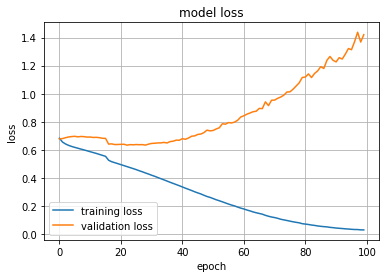

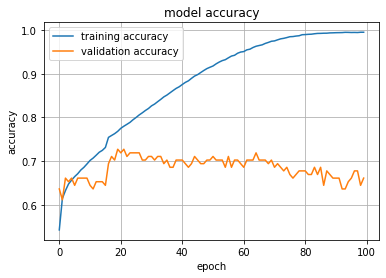

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history['loss'][:100])
plt.plot(history['val_loss'][:100])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='lower left')
plt.show()

plt.plot(history['acc'][:100])
plt.plot(history['val_acc'][:100])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [38]:
print(len(history['acc']))

100


## Evaluation

#### Cross Entropy Loss

In [39]:
pathDataTest = '/content/drive/My Drive/data3/val'
from sklearn.metrics import precision_recall_fscore_support
criterion = nn.CrossEntropyLoss()
['non-nodule', 'nodule']
lst_precision = {'non-nodule': [], 'nodule': []}
lst_recall = {'non-nodule': [], 'nodule': []}
lst_f1score = {'non-nodule': [], 'nodule': []}
print(len(history['acc']))
for x in range(100):
    print('loading model epoch: ', x)
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(x))
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint["state_dict"])

    predLabel, trueLabel = predict(model, criterion, pathDataTest)
    precision, recall, f1score, _ = precision_recall_fscore_support(trueLabel, predLabel, average=None)
    lst_precision['non-nodule'].append(float(precision[0]))
    lst_recall['non-nodule'].append(float(recall[0]))
    lst_f1score['non-nodule'].append(float(f1score[0]))
    
    lst_precision['nodule'].append(float(precision[1]))
    lst_recall['nodule'].append(float(recall[1]))
    lst_f1score['nodule'].append(float(f1score[1]))

    print('='*30)

100
loading model epoch:  0
Loss: 0.6698 Acc: 0.6364
Complete in 0m 1s
loading model epoch:  1
Loss: 0.6731 Acc: 0.6116
Complete in 0m 1s
loading model epoch:  2
Loss: 0.6653 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  3
Loss: 0.6677 Acc: 0.6529
Complete in 0m 1s
loading model epoch:  4
Loss: 0.6688 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  5
Loss: 0.6653 Acc: 0.6446
Complete in 0m 1s
loading model epoch:  6
Loss: 0.6660 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  7
Loss: 0.6624 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  8
Loss: 0.6639 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  9
Loss: 0.6652 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  10
Loss: 0.6621 Acc: 0.6446
Complete in 0m 1s
loading model epoch:  11
Loss: 0.6585 Acc: 0.6364
Complete in 0m 1s
loading model epoch:  12
Loss: 0.6562 Acc: 0.6529
Complete in 0m 1s
loading model epoch:  13
Loss: 0.6582 Acc: 0.6529
Complete in 0m 1s
loading model epoch:  14
Loss: 0.6534 Acc: 0.6529
Comp

### Binary loss

In [ ]:
from preprocessing import inputs_ as I

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
pathDataTest = '/content/drive/My Drive/data3/val'
['non-nodule', 'nodule']
lst_precision = {'non-nodule': [], 'nodule': []}
lst_recall = {'non-nodule': [], 'nodule': []}
lst_f1score = {'non-nodule': [], 'nodule': []}
print(len(history['acc']))

criterion = nn.BCEWithLogitsLoss()
for x in range(100):
    print('loading model epoch: ', x)
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(x))
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint["state_dict"])

    predLabel, trueLabel = predictBCEWithLogitsLoss(model, criterion, pathDataTest)
    precision, recall, f1score, _ = precision_recall_fscore_support(trueLabel, predLabel, average=None)
    lst_precision['non-nodule'].append(float(precision[0]))
    lst_recall['non-nodule'].append(float(recall[0]))
    lst_f1score['non-nodule'].append(float(f1score[0]))
    
    lst_precision['nodule'].append(float(precision[1]))
    lst_recall['nodule'].append(float(recall[1]))
    lst_f1score['nodule'].append(float(f1score[1]))

    print('='*30)

100
loading model epoch:  0
Loss: 0.6611 Acc: 0.6281
Complete in 0m 1s
loading model epoch:  1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss: 0.6587 Acc: 0.6281
Complete in 0m 1s
loading model epoch:  2
Loss: 0.6576 Acc: 0.6281
Complete in 0m 1s
loading model epoch:  3
Loss: 0.6571 Acc: 0.6446
Complete in 0m 1s
loading model epoch:  4
Loss: 0.6579 Acc: 0.6446
Complete in 0m 1s
loading model epoch:  5
Loss: 0.6572 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  6
Loss: 0.6574 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  7
Loss: 0.6577 Acc: 0.6612
Complete in 0m 1s
loading model epoch:  8
Loss: 0.6577 Acc: 0.6860
Complete in 0m 1s
loading model epoch:  9
Loss: 0.6572 Acc: 0.6777
Complete in 0m 1s
loading model epoch:  10
Loss: 0.6569 Acc: 0.6777
Complete in 0m 1s
loading model epoch:  11
Loss: 0.6573 Acc: 0.6777
Complete in 0m 1s
loading model epoch:  12
Loss: 0.6571 Acc: 0.6777
Complete in 0m 1s
loading model epoch:  13
Loss: 0.6570 Acc: 0.6694
Complete in 0m 1s
loading model epoch:  14
Loss: 0.6573 Acc: 0.6694
Complete in 0m 1s
loading model epoch:  15
Loss: 0.6570 Acc: 0.6860
Complete in 0m 1s
loading model

###Check

In [40]:
def Nmaxelements(lst, N): 
    final_list = []

    for i in range(0, N):  
        max_val = 0
        max_index = 0
        for index in range(len(lst)):     
            if (index in final_list):
                continue
            if (lst[index] > max_val): 
                max_val = lst[index]
                max_index = index        
        final_list.append(max_index)
        
    return final_list

tempt = []
for x in range(len(lst_f1score['non-nodule'])):
    tempt.append((lst_f1score['non-nodule'][x] + lst_f1score['nodule'][x])/2)
max_epoch = Nmaxelements(tempt, 10)
print(max_epoch)

[64, 50, 55, 19, 21, 44, 52, 57, 58, 61]


In [41]:
run_path = os.path.join(exp_path, 'running')

path = os.path.join(run_path, 'precision-val.p')
with open(path, 'wb') as f:
    pickle.dump(lst_precision, f)

path = os.path.join(run_path, 'recall-val.p')
with open(path, 'wb') as f:
    pickle.dump(lst_recall, f)

path = os.path.join(run_path, 'f1score-val.p')
with open(path, 'wb') as f:
    pickle.dump(lst_f1score, f)

## Classification Report

In [42]:
run_path = os.path.join(exp_path, 'running')

path = os.path.join(run_path, 'f1score-val.p')
with open(path, 'rb') as f:
    lst_f1score = pickle.load(f)

###Cross Entropy Loss

In [43]:
pathDataTest = '/content/drive/My Drive/data3/test'
criterion = nn.CrossEntropyLoss()

lst_predLabel = {}
lst_trueLabel = {}
for x in max_epoch:
    print('loading model epoch: ', x)
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(x))
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint["state_dict"])

    predLabel, trueLabel = predict(model, criterion, pathDataTest)
    lst_predLabel[x] = predLabel
    lst_trueLabel[x] = trueLabel


loading model epoch:  64
Loss: 0.9353 Acc: 0.5976
Complete in 0m 44s
loading model epoch:  50
Loss: 0.7869 Acc: 0.6016
Complete in 0m 2s
loading model epoch:  55
Loss: 0.8345 Acc: 0.6057
Complete in 0m 2s
loading model epoch:  19
Loss: 0.6337 Acc: 0.6504
Complete in 0m 2s
loading model epoch:  21
Loss: 0.6393 Acc: 0.6463
Complete in 0m 2s
loading model epoch:  44
Loss: 0.7353 Acc: 0.6098
Complete in 0m 2s
loading model epoch:  52
Loss: 0.8006 Acc: 0.6057
Complete in 0m 2s
loading model epoch:  57
Loss: 0.8483 Acc: 0.5935
Complete in 0m 2s
loading model epoch:  58
Loss: 0.8691 Acc: 0.5976
Complete in 0m 2s
loading model epoch:  61
Loss: 0.9017 Acc: 0.6016
Complete in 0m 2s


### Binary Loss

In [ ]:
pathDataTest = '/content/drive/My Drive/data3/test'

criterion = nn.BCEWithLogitsLoss()

lst_predLabel = {}
lst_trueLabel = {}
for x in max_epoch:
    print('loading model epoch: ', x)
    model_path = os.path.join(exp_path, 'model_epoch')
    path = os.path.join(model_path, 'model-epoch-{}.pth'.format(x))
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint["state_dict"])

    predLabel, trueLabel = predictBCEWithLogitsLoss(model, criterion, pathDataTest)
    lst_predLabel[x] = predLabel
    lst_trueLabel[x] = trueLabel

loading model epoch:  44
Loss: 0.6436 Acc: 0.6382
Complete in 1m 13s
loading model epoch:  47
Loss: 0.6451 Acc: 0.6423
Complete in 0m 2s
loading model epoch:  53
Loss: 0.6478 Acc: 0.6423
Complete in 0m 2s
loading model epoch:  59
Loss: 0.6487 Acc: 0.6382
Complete in 0m 2s
loading model epoch:  99
Loss: 0.6384 Acc: 0.6667
Complete in 0m 2s
loading model epoch:  55
Loss: 0.6472 Acc: 0.6423
Complete in 0m 2s
loading model epoch:  57
Loss: 0.6477 Acc: 0.6463
Complete in 0m 2s
loading model epoch:  62
Loss: 0.6497 Acc: 0.6382
Complete in 0m 2s
loading model epoch:  63
Loss: 0.6503 Acc: 0.6382
Complete in 0m 2s
loading model epoch:  36
Loss: 0.6475 Acc: 0.6423
Complete in 0m 2s


###Check

In [44]:
import time
target_labels = ['non-nodule', 'nodule']


for key in lst_predLabel.keys():
    print("Model epoch:", key)
    print('Classification Report')
    print(classification_report(lst_trueLabel[key], lst_predLabel[key], target_names=target_labels))
    print('='*30)

Model epoch: 64
Classification Report
              precision    recall  f1-score   support

  non-nodule       0.43      0.29      0.34        91
      nodule       0.65      0.78      0.71       155

    accuracy                           0.60       246
   macro avg       0.54      0.53      0.53       246
weighted avg       0.57      0.60      0.57       246

Model epoch: 50
Classification Report
              precision    recall  f1-score   support

  non-nodule       0.43      0.25      0.32        91
      nodule       0.65      0.81      0.72       155

    accuracy                           0.60       246
   macro avg       0.54      0.53      0.52       246
weighted avg       0.57      0.60      0.57       246

Model epoch: 55
Classification Report
              precision    recall  f1-score   support

  non-nodule       0.44      0.26      0.33        91
      nodule       0.65      0.81      0.72       155

    accuracy                           0.61       246
   macro avg  

In [45]:
import time
target_labels = ['non-nodule', 'nodule']

best_score = 0
best_epoch = None
for key in lst_predLabel.keys():
    precision, recall, f1score, _ = precision_recall_fscore_support(lst_trueLabel[key], lst_predLabel[key], average=None)
    if (f1score[0] + f1score[1])/2 > best_score:
        best_score = (f1score[0] + f1score[1])
        best_epoch = key
print(key)

61


In [33]:
best_epoch = 6

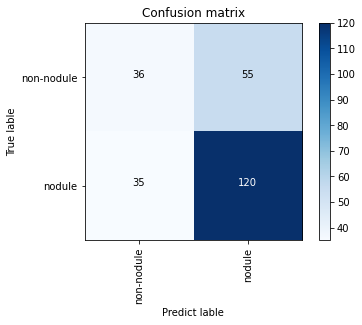

In [34]:
draw_heatmap_confusion_matrix(lst_trueLabel[best_epoch], lst_predLabel[best_epoch], target_labels) 

#Demo

Hiển thị các đối tượng được phân loại

In [ ]:
%cd /content/drive/My Drive/nodule-classification

/content/drive/My Drive/nodule-classification


In [ ]:
import numpy as np

import os
import sys
sys.path.insert(0, 'running')
from running.datasets import roiCube
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/drive/My Drive/data3/val'

In [ ]:
dataset = roiCube(base_dir, 64, balance_sample = False)
batchData = DataLoader(dataset, batch_size= 1, shuffle= False)
numCandidate = len(dataset)

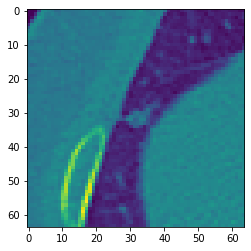

tensor([0])


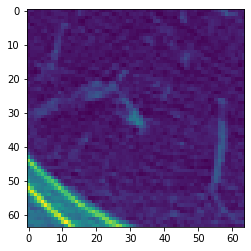

tensor([0])


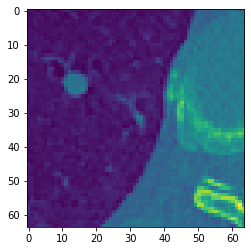

tensor([0])


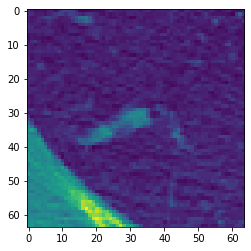

tensor([0])


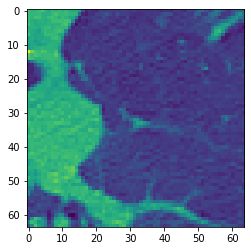

tensor([0])


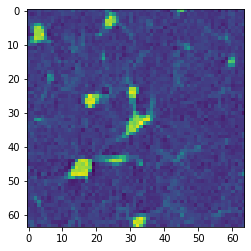

tensor([0])


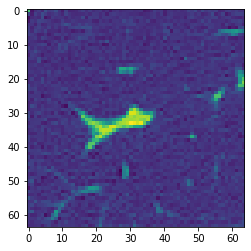

tensor([0])


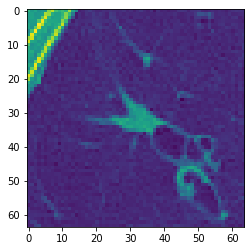

tensor([0])


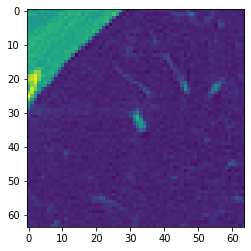

tensor([0])


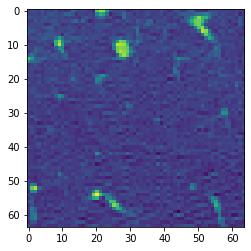

tensor([0])


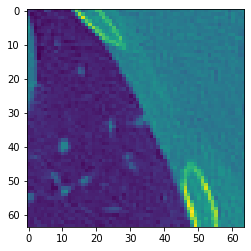

tensor([0])


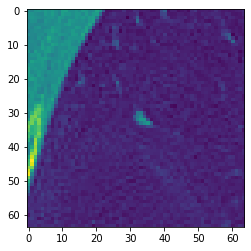

tensor([0])


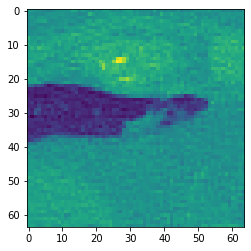

tensor([0])


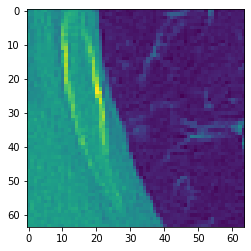

tensor([0])


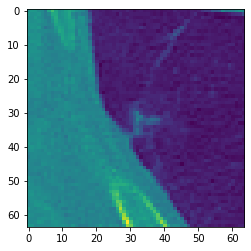

tensor([0])


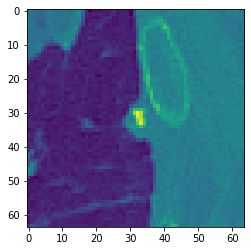

tensor([0])


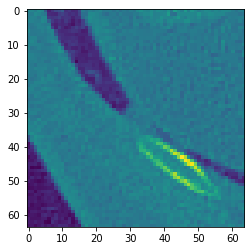

tensor([0])


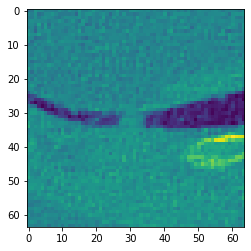

tensor([0])


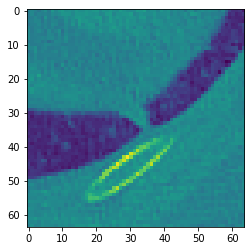

tensor([0])


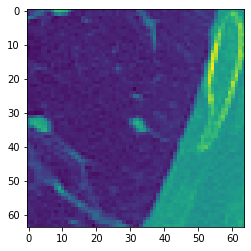

tensor([0])


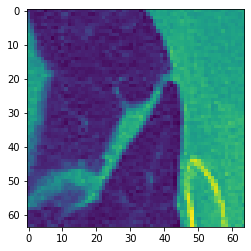

tensor([0])


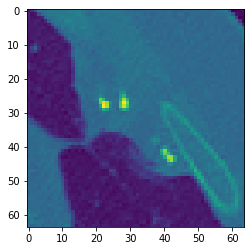

tensor([0])


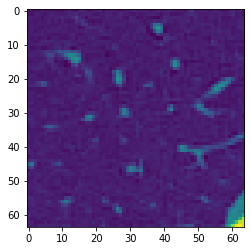

tensor([0])


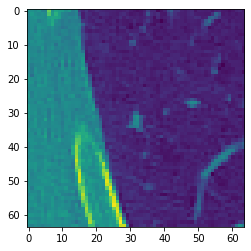

tensor([0])


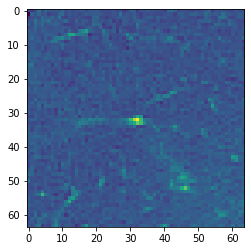

tensor([0])


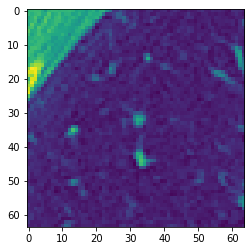

tensor([0])


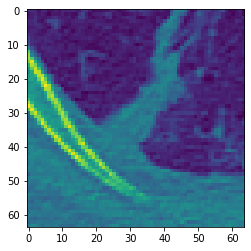

tensor([0])


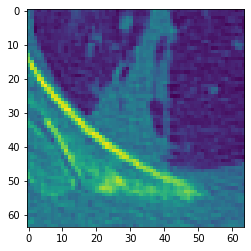

tensor([0])


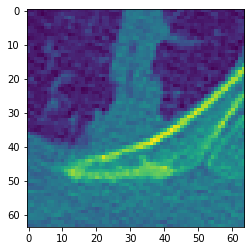

tensor([0])


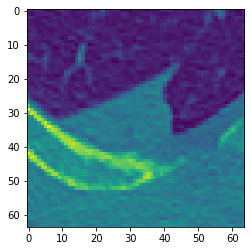

tensor([0])


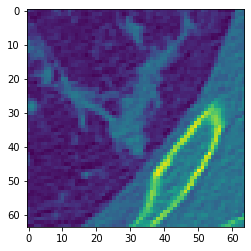

tensor([0])


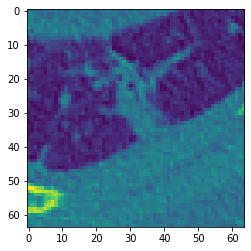

tensor([0])


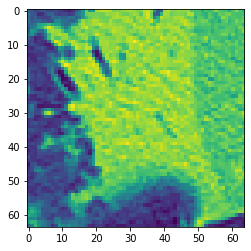

tensor([0])


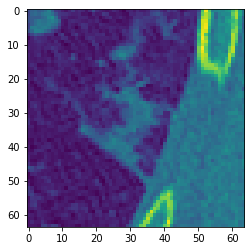

tensor([0])


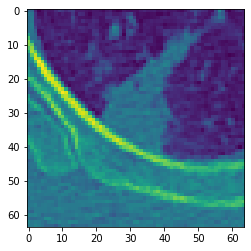

tensor([0])


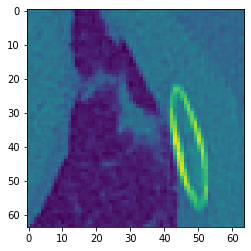

tensor([0])


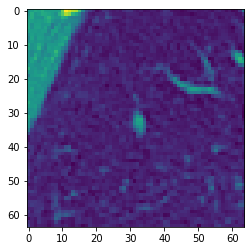

tensor([0])


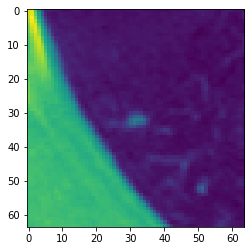

tensor([0])


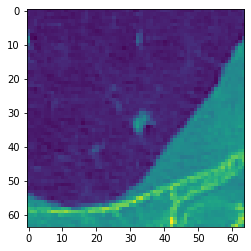

tensor([0])


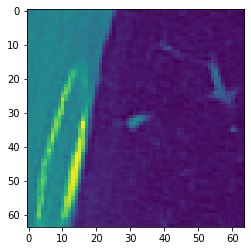

tensor([0])


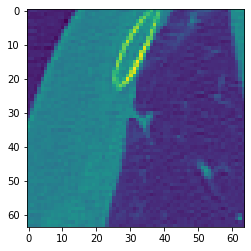

tensor([0])


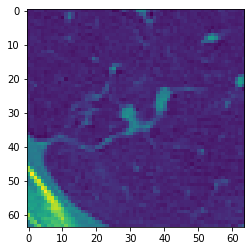

tensor([0])


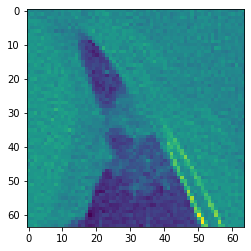

tensor([0])


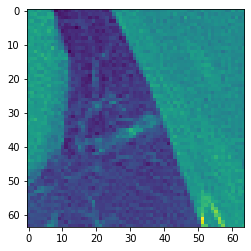

tensor([0])


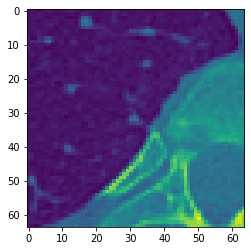

tensor([0])


In [ ]:
for inputs, label in batchData:
    if(label == torch.tensor([0])):
        plt.imshow(inputs[0][0][32,:,:])
        plt.show()
        print(label)

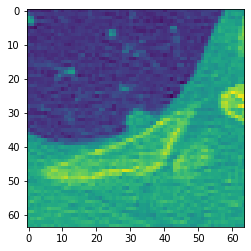

tensor([1])


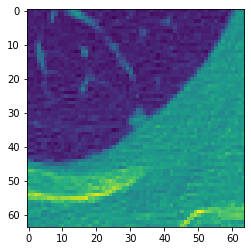

tensor([1])


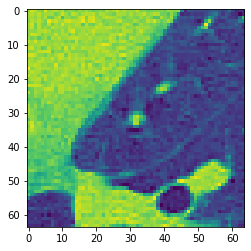

tensor([1])


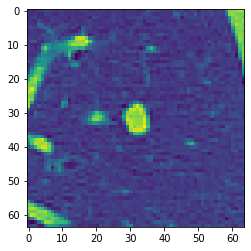

tensor([1])


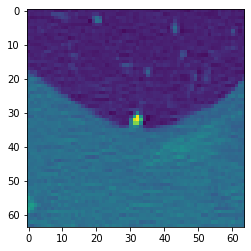

tensor([1])


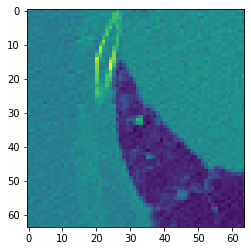

tensor([1])


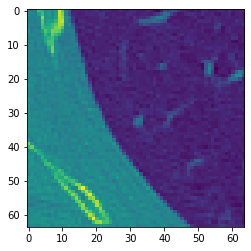

tensor([1])


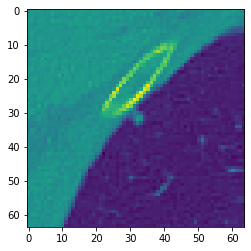

tensor([1])


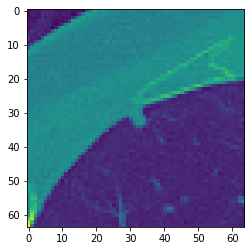

tensor([1])


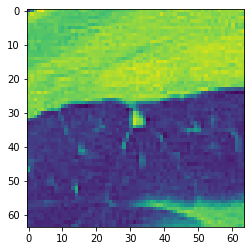

tensor([1])


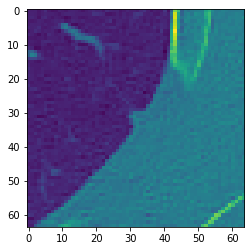

tensor([1])


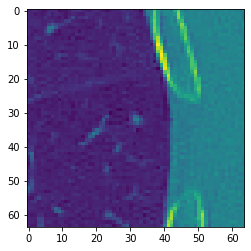

tensor([1])


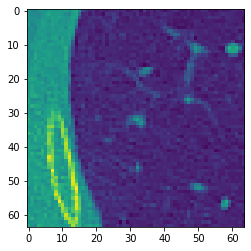

tensor([1])


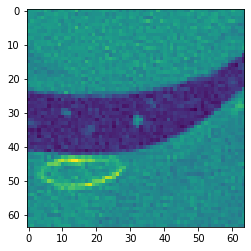

tensor([1])


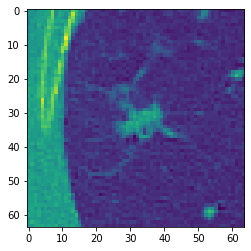

tensor([1])


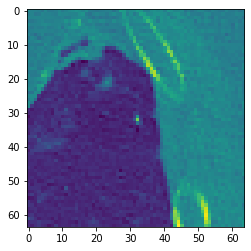

tensor([1])


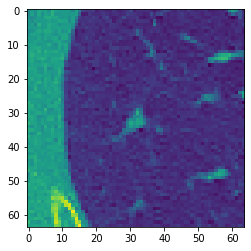

tensor([1])


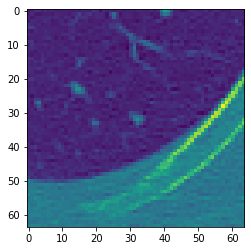

tensor([1])


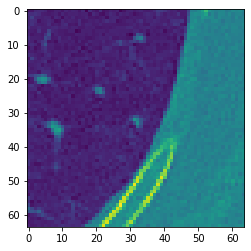

tensor([1])


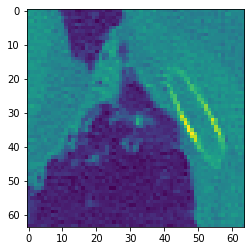

tensor([1])


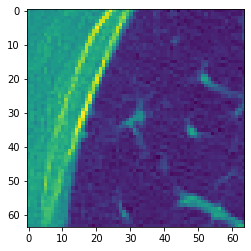

tensor([1])


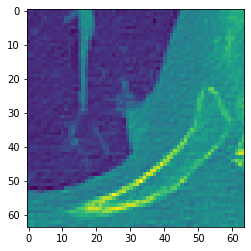

tensor([1])


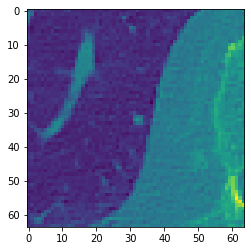

tensor([1])


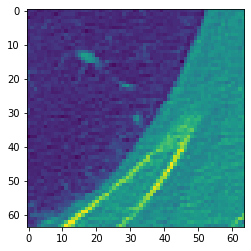

tensor([1])


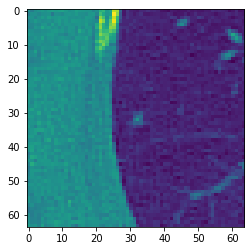

tensor([1])


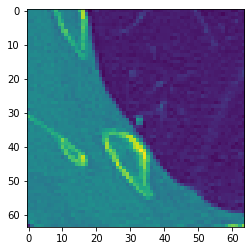

tensor([1])


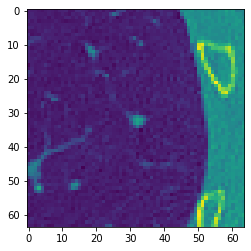

tensor([1])


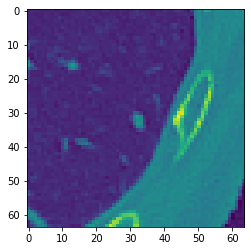

tensor([1])


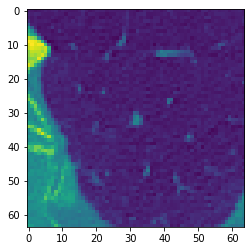

tensor([1])


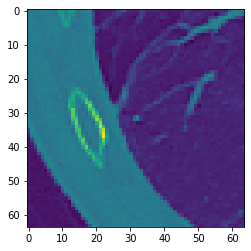

tensor([1])


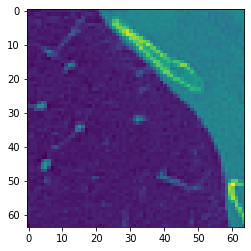

tensor([1])


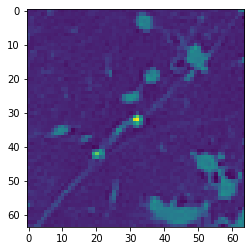

tensor([1])


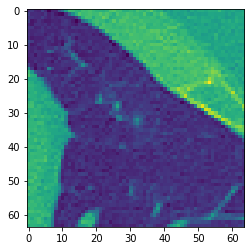

tensor([1])


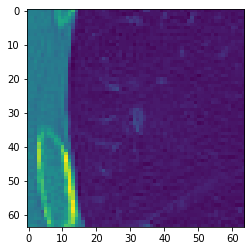

tensor([1])


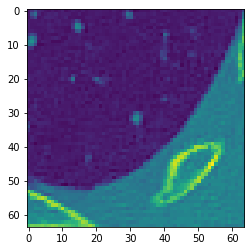

tensor([1])


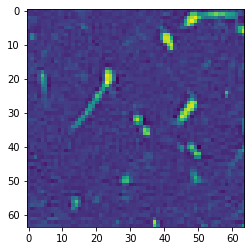

tensor([1])


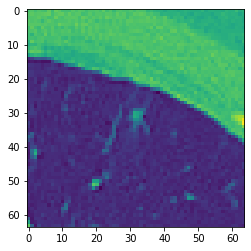

tensor([1])


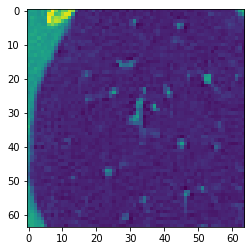

tensor([1])


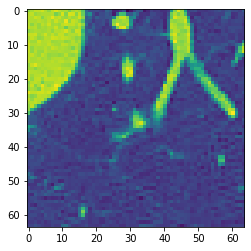

tensor([1])


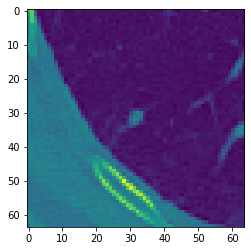

tensor([1])


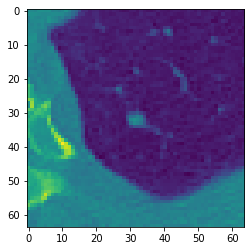

tensor([1])


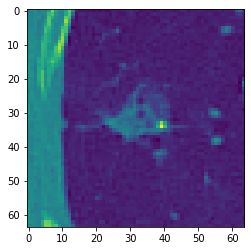

tensor([1])


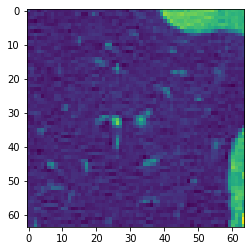

tensor([1])


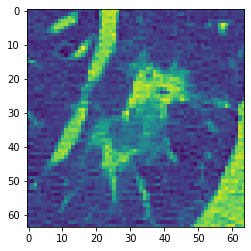

tensor([1])


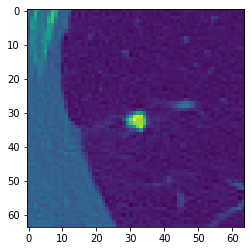

tensor([1])


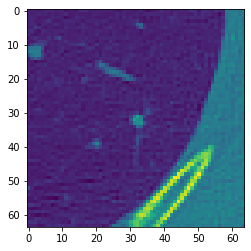

tensor([1])


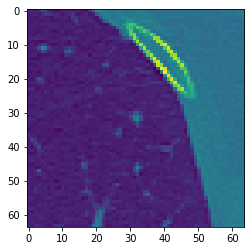

tensor([1])


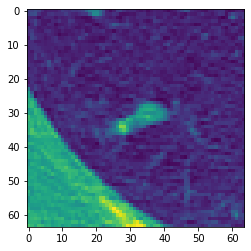

tensor([1])


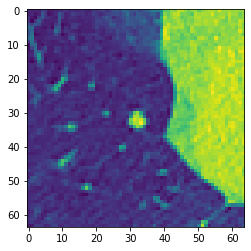

tensor([1])


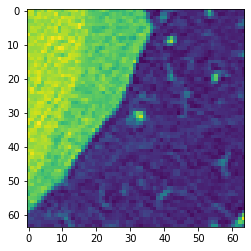

tensor([1])


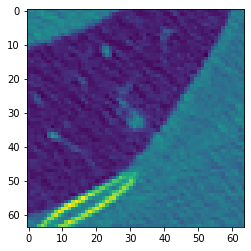

tensor([1])


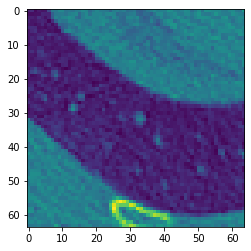

tensor([1])


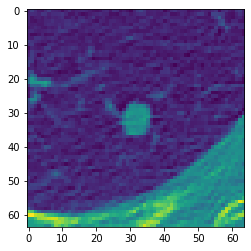

tensor([1])


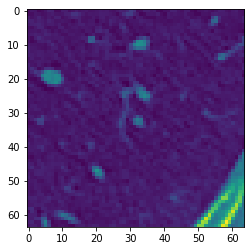

tensor([1])


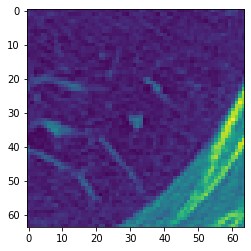

tensor([1])


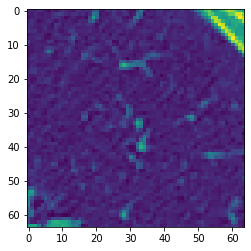

tensor([1])


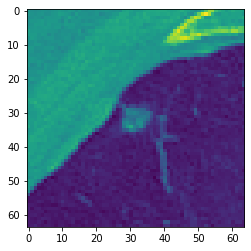

tensor([1])


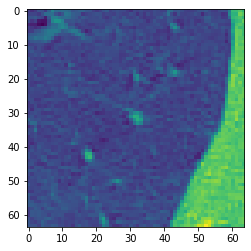

tensor([1])


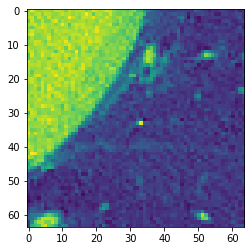

tensor([1])


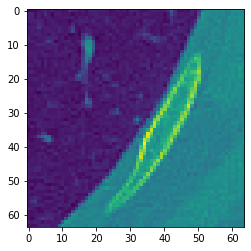

tensor([1])


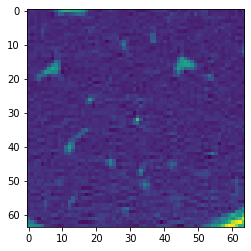

tensor([1])


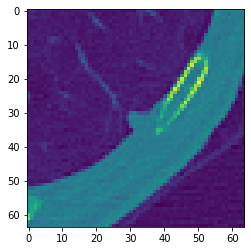

tensor([1])


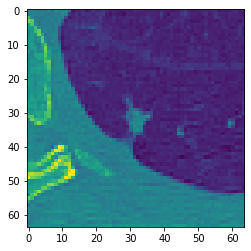

tensor([1])


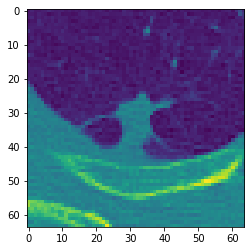

tensor([1])


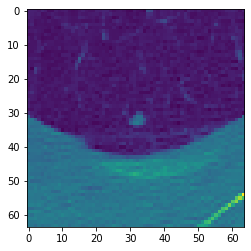

tensor([1])


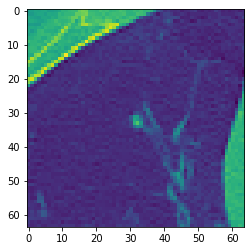

tensor([1])


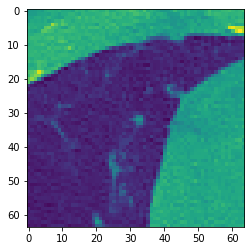

tensor([1])


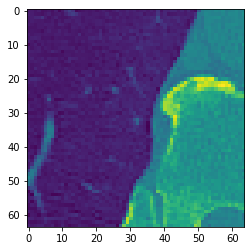

tensor([1])


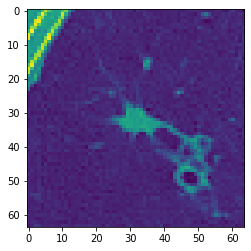

tensor([1])


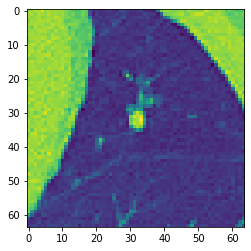

tensor([1])


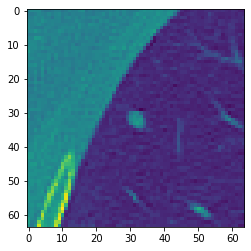

tensor([1])


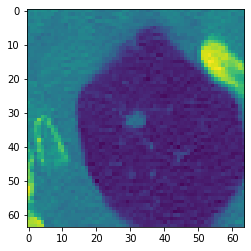

tensor([1])


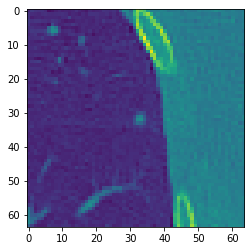

tensor([1])


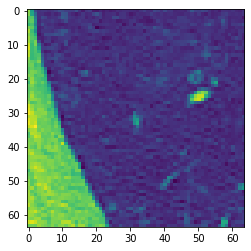

tensor([1])


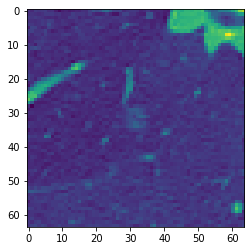

tensor([1])


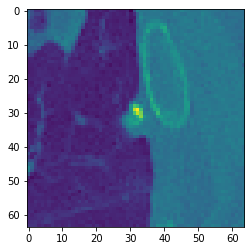

tensor([1])


In [ ]:
for inputs, label in batchData:
    if(label == torch.tensor([1])):
        plt.imshow(inputs[0][0][32,:,:])
        plt.show()
        print(label)

Phân loại